In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df_rating = pd.read_csv('C:/Users/abhishek nigam/Documents/Archa Docs/Python/Python Projects/Recommendation system engine/ml-latest-small/ratings.csv')
df_rating.head(2)
df_title = pd.read_csv('C:/Users/abhishek nigam/Documents/Archa Docs/Python/Python Projects/Recommendation system engine/ml-latest-small/movietitle.csv')
df_title.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [21]:
df_movie = df_rating.merge(df_title, on = 'movieId')
df_movie.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [34]:
print(df_movie.dtypes)
print(df_movie.nunique())
print(df_movie.describe(include=['object']))

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object
userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
dtype: int64
                      title  genres
count                100836  100836
unique                 9719     951
top     Forrest Gump (1994)  Comedy
freq                    329    7196


In [56]:
# to check level of data
df_dummy = df_movie['userId'].map(str) + '-' + df_movie['movieId'].map(str) + '-' + df_movie['rating'].map(str) + '-' + df_movie['timestamp'].map(str) + '-' + df_movie['title'].map(str) + '-' + df_movie['genres'].map(str) 
df_dummy.head(2)

0    1-1-4.0-964982703-Toy Story (1995)-Adventure|A...
1    5-1-4.0-847434962-Toy Story (1995)-Adventure|A...
dtype: object

In [55]:
print(df_dummy.describe(include=['object']))

count       100836
unique      100836
top       448-2788
freq             1
dtype: object


In [58]:
df_movie.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [59]:
ratings = pd.DataFrame(df_movie.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [60]:
ratings['num_of_ratings'] = df_movie.groupby('title')['rating'].count()
ratings.head()

,rating,num_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


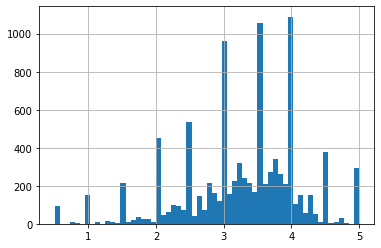

In [67]:
ratings['rating'].hist(bins = 60)


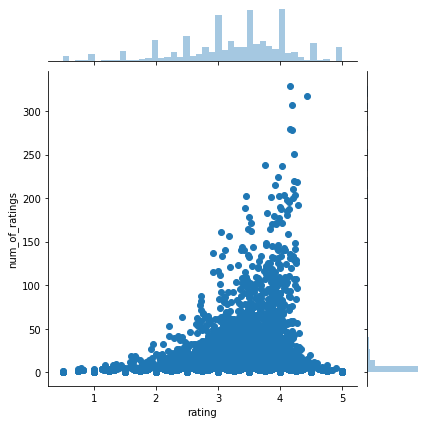

In [65]:
sns.jointplot(x='rating', y='num_of_ratings', data=ratings)

In [71]:
# Item based Recommendation
movie_matrix = df_movie.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
ratings.sort_values('num_of_ratings', ascending=False).head(10)

,rating,num_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [73]:
Matrix_user_rating = movie_matrix['Matrix, The (1999)']
JP_user_rating = movie_matrix['Jurassic Park (1993)']

In [74]:
print(Matrix_user_rating.head())
print(JP_user_rating.head())

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64
userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Jurassic Park (1993), dtype: float64


In [80]:
# Check the corelation between two movies
same_as_Matrix=movie_matrix.corrwith(Matrix_user_rating)
same_as_Matrix

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.049146
xXx (2002)                                   0.495251
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                       -0.006953
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [83]:
same_as_Jurrasic=movie_matrix.corrwith(JP_user_rating)
same_as_Jurrasic

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.292988
xXx (2002)                                  -0.104927
xXx: State of the Union (2005)              -0.953463
¡Three Amigos! (1986)                        0.246808
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [84]:
# Drop irrelavant movies (all NaN values)
corr_Jurrasic = pd.DataFrame(same_as_Jurrasic, columns=['Correlation'])
corr_Jurrasic.dropna(inplace=True)
print(corr_Jurrasic.head())

corr_Matrix = pd.DataFrame(same_as_Matrix, columns=['correlation'])
same_as_Matrix.dropna(inplace=True)
print(same_as_Matrix.head())

                                Correlation
title                                      
'burbs, The (1989)                 0.104077
(500) Days of Summer (2009)       -0.125237
*batteries not included (1987)     0.290929
...And Justice for All (1979)     -0.981981
10 Cent Pistol (2015)             -1.000000
title
'burbs, The (1989)               -0.160843
(500) Days of Summer (2009)       0.302316
*batteries not included (1987)    0.392232
...And Justice for All (1979)     0.654654
10 Cent Pistol (2015)            -1.000000
dtype: float64


In [86]:
# set up thresholds
corr_Jurrasic = corr_Jurrasic.join(ratings['num_of_ratings'])
corr_Matrix = corr_Matrix.join(ratings['num_of_ratings'])
print(corr_Jurrasic .head())
print(corr_Matrix.head())

                                Correlation  num_of_ratings
title                                                      
'burbs, The (1989)                 0.104077              17
(500) Days of Summer (2009)       -0.125237              42
*batteries not included (1987)     0.290929               7
...And Justice for All (1979)     -0.981981               3
10 Cent Pistol (2015)             -1.000000               2
                                         correlation  num_of_ratings
title                                                               
'71 (2014)                                       NaN               1
'Hellboy': The Seeds of Creation (2004)          NaN               1
'Round Midnight (1986)                           NaN               2
'Salem's Lot (2004)                              NaN               1
'Til There Was You (1997)                        NaN               2


In [90]:
corr_Jurrasic[corr_Jurrasic['num_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108
Mission: Impossible (1996),0.451929,162
Die Hard (1988),0.451241,145
X-Men (2000),0.448910,133
Twister (1996),0.440167,123


In [91]:
corr_Matrix[corr_Matrix['num_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,num_of_ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
"Lion King, The (1994)",0.444932,172
"Monsters, Inc. (2001)",0.441205,132
Batman Begins (2005),0.440338,116
Jurassic Park (1993),0.427936,238
